---

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import KFold
from scipy.stats import spearmanr
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
# read in the data
bcw = pd.read_csv('breast-cancer-wisconsin.data', header=None, index_col=0)
bcw

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
776715,3,1,1,1,3,2,1,1,1,2
841769,2,1,1,1,2,1,1,1,1,2
888820,5,10,10,3,7,3,8,10,2,4


In [3]:
# proportion of benign and malignant
bcw[10].value_counts()

2    458
4    241
Name: 10, dtype: int64

In [4]:
# check the values
counts = bcw.apply(pd.Series.value_counts)
print(counts, '\n')
print('The total number of values count from each column are\n', counts.sum())

       1      2      3      4      5      6      7      8      9      10
1   145.0  384.0  353.0  407.0   47.0    NaN  152.0  443.0  579.0    NaN
2    50.0   45.0   59.0   58.0  386.0    NaN  166.0   36.0   35.0  458.0
3   108.0   52.0   56.0   58.0   72.0    NaN  165.0   44.0   33.0    NaN
4    80.0   40.0   44.0   33.0   48.0    NaN   40.0   18.0   12.0  241.0
5   130.0   30.0   34.0   23.0   39.0    NaN   34.0   19.0    6.0    NaN
6    34.0   27.0   30.0   22.0   41.0    NaN   10.0   22.0    3.0    NaN
7    23.0   19.0   30.0   13.0   12.0    NaN   73.0   16.0    9.0    NaN
8    46.0   29.0   28.0   25.0   21.0    NaN   28.0   24.0    8.0    NaN
9    14.0    6.0    7.0    5.0    2.0    NaN   11.0   16.0    NaN    NaN
10   69.0   67.0   58.0   55.0   31.0    NaN   20.0   61.0   14.0    NaN
1     NaN    NaN    NaN    NaN    NaN  402.0    NaN    NaN    NaN    NaN
10    NaN    NaN    NaN    NaN    NaN  132.0    NaN    NaN    NaN    NaN
2     NaN    NaN    NaN    NaN    NaN   30.0    NaN

In [5]:
# notice that there are 16 missing values(denoted by ?) on column 6
# do an imputation on missing values
# because the number of missing values are relatively small, use KNN imputation
bcw[6] = pd.to_numeric(bcw[6], errors='coerce', downcast='integer')
# n_neighbors = sqrt(N)/2 where N is the number of observations
imputer = KNNImputer(n_neighbors = 13,)
bcw_imputed = imputer.fit_transform(bcw,).astype(float)

In [6]:
res = []
p_val = []
for i in range(9):
    inside = [0] * 9
    inside_p = [0] * 9
    for j in range(i, 9):
        inside[j], inside_p[j] = spearmanr(bcw_imputed[:, i], bcw_imputed[:, j])
    res.append(inside)
    p_val.append(inside_p)

In [7]:
print('spearman correlation')
pd.DataFrame(res)

spearman correlation


,0,1,2,3,4,5,6,7,8
0,1.0,0.666463,0.664121,0.541593,0.583979,0.586683,0.538093,0.570398,0.418717
1,0.0,1.000000,0.891904,0.742517,0.787159,0.766714,0.719330,0.757199,0.508780
2,0.0,0.000000,1.000000,0.711730,0.759234,0.749435,0.692316,0.725268,0.472749
3,0.0,0.000000,0.000000,1.000000,0.667809,0.689148,0.624515,0.634310,0.446992
4,0.0,0.000000,0.000000,0.000000,1.000000,0.688123,0.639507,0.705997,0.480255
5,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.675385,0.659650,0.468629
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.662309,0.386944
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.504140
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [8]:
print('p values for spearman correlation')
pd.DataFrame(p_val)

p values for spearman correlation


,0,1,2,3,4,5,6,7,8
0,0.0,5.848553e-91,4.120269e-90,1.579851e-54,3.863017e-65,7.180281e-66,1.019895e-53,1.430919e-61,4.787046e-31
1,0.0,0.000000e+00,2.051331e-242,2.019135e-123,1.949759e-148,2.765665e-136,2.196956e-112,4.792305e-131,2.708340e-47
2,0.0,0.000000e+00,0.000000e+00,5.241846e-109,3.806809e-132,6.004621e-127,7.406487e-101,4.203243e-115,3.306424e-40
3,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.889927e-91,1.375502e-99,7.350140e-77,5.875811e-80,1.235069e-35
4,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.509077e-99,1.201148e-81,1.569154e-106,1.293566e-41
5,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.922734e-94,1.629449e-88,1.893053e-39
6,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.842213e-89,2.190019e-26
7,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.473636e-46
8,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Based on above, feature 1 and feature 2 have high correlation, drop feature 1.

In [9]:
mutual_info_classif(bcw_imputed[:, :-1], bcw_imputed[:, -1])

array([0.32682942, 0.45893597, 0.45294942, 0.29089589, 0.34475505,
       0.38633829, 0.3853005 , 0.32623529, 0.14044303])

Based on Mutual Information, feature 8 doesn't tell much about the result, drop feature 8.

In [10]:
# shift the label from 2, 4 to 0, 1
bcw_imputed[:, -1] = (bcw_imputed[:, -1] - 2)/2
bcw_imputed

array([[ 5.,  1.,  1., ...,  1.,  1.,  0.],
       [ 5.,  4.,  4., ...,  2.,  1.,  0.],
       [ 3.,  1.,  1., ...,  1.,  1.,  0.],
       ...,
       [ 5., 10., 10., ..., 10.,  2.,  1.],
       [ 4.,  8.,  6., ...,  6.,  1.,  1.],
       [ 4.,  8.,  8., ...,  4.,  1.,  1.]])

In [11]:
selected = torch.tensor(bcw_imputed[:, [0, 2, 3, 4, 5, 6, 7, -1]],)

In [12]:
class BCW(Dataset):
    def __init__(self, data):
        self.data = data[:, :-1]
        self.label = data[:, -1]
        
    def __len__(self): return len(self.label)
    
    def __getitem__(self, idx):
        return [self.data[idx], self.label[idx]]

In [13]:
def create_model(layers):
    model = nn.Sequential()
    for i, n_input in enumerate(layers):
        if i < len(layers) - 1:
            module = nn.Linear(n_input, layers[i + 1])
            nn.init.xavier_normal_(module.weight)
            model.add_module('linear'+str(i), module)
        if i < len(layers) - 2:
            model.add_module('relu'+str(i), nn.ReLU())
    return model

In [14]:
def binary_acc(y_pred, y_test):
    y_pred = y_pred.clone().detach()
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    correct_results_sum = (y_pred_tag == y_test).sum().float()

    acc = correct_results_sum/y_test.shape[0]

    acc = torch.round(acc * 100)
    
    return acc

In [15]:
layers = [7, 14, 7, 1]
criterion = nn.BCEWithLogitsLoss()
learning_rate = 0.001
n_epochs = 300

history = {'loss':[0]*n_epochs, "accuracy": [0]*n_epochs, 'loss_val':[0]*n_epochs, 'accuracy_val':[0]*n_epochs}

kf = KFold(n_splits=5, shuffle = True)
fold_gen = kf.split(selected)

for i, (train_idx, val_idx) in enumerate(fold_gen, 1):
    train_set = selected[train_idx].clone().detach().requires_grad_(True)
    val_set = selected[val_idx].clone().detach()
    train_loader = DataLoader(BCW(train_set), batch_size = 64, shuffle=True)
    # val_loader = DataLoader(BCW(val_set))
    
    # for every validation, initialize a new model
    model = create_model(layers)
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum=0.9)
    for epoch in range(n_epochs):
        model.train()
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0
        for idx, (batch, target) in enumerate(train_loader):
            optimizer.zero_grad()
            y_pred = model(batch.float())

            loss = criterion(y_pred, target.unsqueeze(1))
            loss.backward()
            optimizer.step()
            
        acc_train = binary_acc(y_pred, target.unsqueeze(1)) 
        train_loss += loss.item()
        train_acc += acc_train.item()
        history['loss'][epoch] += train_loss
        history['accuracy'][epoch] += train_acc
        model.eval()
        y_hat = model(val_set[:, :-1].float())
        loss_val = criterion(y_hat, val_set[:, -1].unsqueeze(1))
        acc_val = binary_acc(y_hat, val_set[:, -1].unsqueeze(1))
        val_loss += loss_val.item()
        val_acc += acc_val.item()
        history['loss_val'][epoch] += val_loss
        history['accuracy_val'][epoch] += val_acc
    print(f'Validation Fold {i}')
    print('-'*100)
    print(f'Final Training Loss: {loss:.5f} | Final Validation Loss: {loss_val:.5f} | Accuracy: {acc_train:.3f} | Validation Accuracy: {acc_val:.3f}')
    print('\n')
    
for k, v in history.items():
    history[k] = list(map(lambda x: x/5, history[k]))

Validation Fold 1
----------------------------------------------------------------------------------------------------
Final Training Loss: 0.05934 | Final Validation Loss: 0.05730 | Accuracy: 98.000 | Validation Accuracy: 98.000


Validation Fold 2
----------------------------------------------------------------------------------------------------
Final Training Loss: 0.10379 | Final Validation Loss: 0.13598 | Accuracy: 98.000 | Validation Accuracy: 96.000


Validation Fold 3
----------------------------------------------------------------------------------------------------
Final Training Loss: 0.13000 | Final Validation Loss: 0.13486 | Accuracy: 94.000 | Validation Accuracy: 96.000


Validation Fold 4
----------------------------------------------------------------------------------------------------
Final Training Loss: 0.11556 | Final Validation Loss: 0.09985 | Accuracy: 98.000 | Validation Accuracy: 96.000


Validation Fold 5
------------------------------------------------------

In [16]:
plt.rcParams['figure.figsize'] = [12, 8]

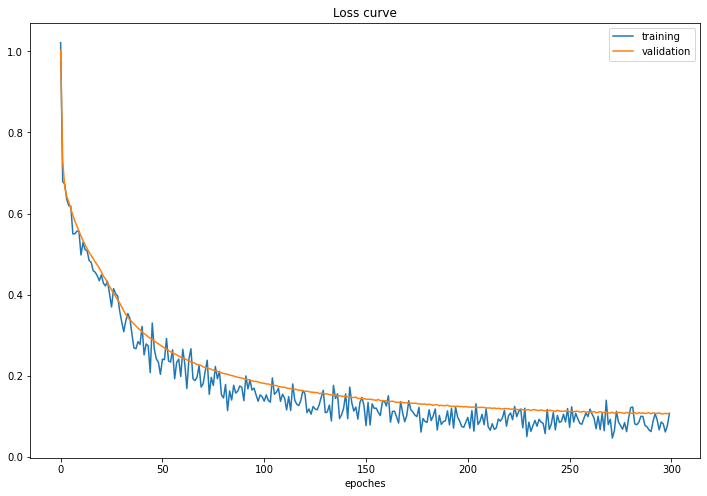

In [17]:
plt.plot(history['loss'], label='training')
plt.plot(history['loss_val'], label='validation')
plt.legend()
plt.title('Loss curve')
plt.xlabel('epoches')
plt.savefig('training_curves.png')
plt.show()

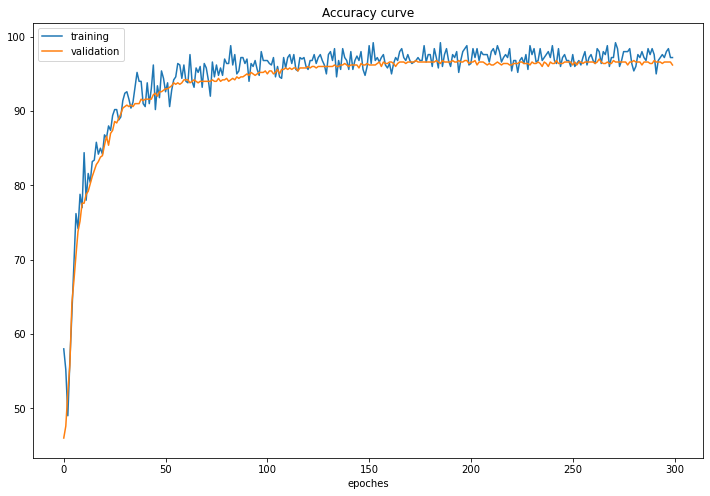

In [18]:
plt.plot(history['accuracy'], label = 'training')
plt.plot(history['accuracy_val'], label = 'validation')
plt.legend()
plt.title('Accuracy curve')
plt.xlabel('epoches')
plt.savefig('accuracy_curves.png')
plt.show()